# Pattern Recognition 2 - Feature Space

**Objectives**

* Compute distances between objects in feature space
* Use PCA to perform reduce the dimensionality of the problem
* Implement face recognition using [Eigenfaces](http://en.wikipedia.org/wiki/Eigenface)

## Feature space distance

The `ocr_features.npy` file contains extracted features for each letter from the document used in the previous lab, and the `ocr_class.npy` file contains the character corresponding to these features.

The 18 features, extracted with the `regionprops` methods from `scikit-image` are, in order: 

> area, convex area, eccentricity, equivalent diameter, extent, filled area, intertia tensor eigenvalue 1, inertia tensor eigenvalue 2, major axis length, minor axis length, Hu moment 1, Hu moment 2, Hu moment 3, Hu moment 4, Hu moment 5, Hu moment 6, perimeter, solidity

* Create a method which computes the Euclidian distance, in feature space, between two objects.
* Check if the "nearest" object is of the same class.
* What can you do to improve this "distance-based" classification? 

In [2]:
import numpy as np

ocr_features = np.load('ocr_features.npy')
ocr_class = np.load('ocr_class.npy')

print(ocr_features.shape)
print(np.unique(ocr_class))

(2392, 18)
['0' '1' '4' '5' 'A' 'B' 'C' 'D' 'F' 'G' 'I' 'L' 'M' 'N' 'O' 'R' 'S' 'T'
 'W' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [3]:

## -- Your code here -- ##


## Eigenfaces

The `faces.npy` file contains a 3D matrix containing 2963 images, each with 170x200 pixels, encoded in 8-bit grayscale.

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

faces = np.load('faces.npy')
print(faces.shape, faces.dtype, faces.min(), faces.max())

(2963, 200, 170) uint8 0 255


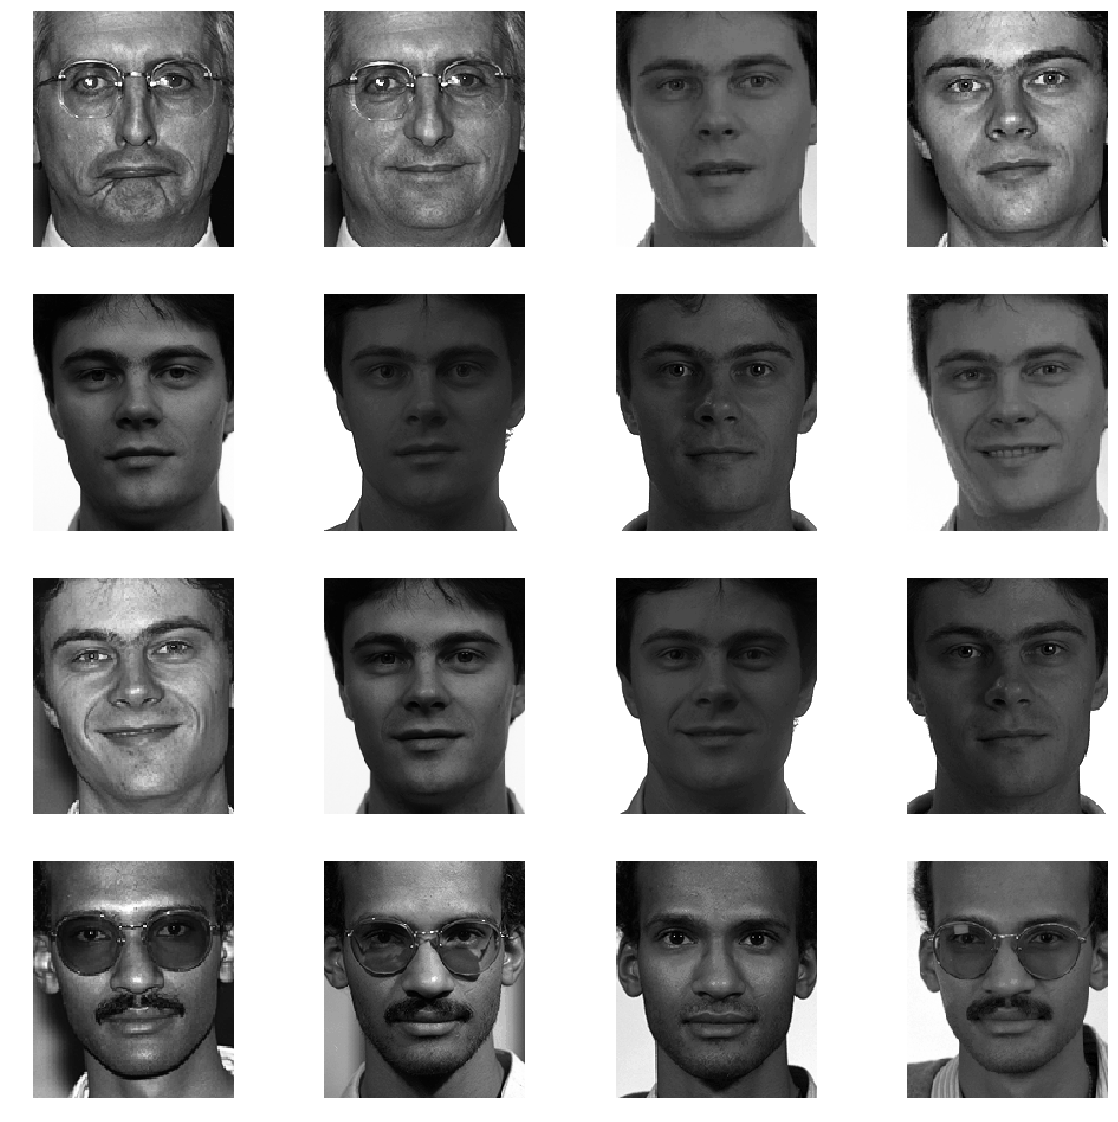

In [11]:
# Show some faces:
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(faces[i], cmap=plt.cm.gray)
    plt.axis('off')
plt.show()

### Direct approach

1. Write a program that subsample the images (e.g. by 5), converts 2D images into lines, and collect all these lines into one single matrix **T**.
1. Zero-center **T** by removing the "mean image" ($T_i \leftarrow T_i - T_{mean}$)
1. Compute the variance/covariance matrix of **T**:
$$ \mathbf{S} = \mathbf{T^TT}$$
1. Compute the eigenvalues $\lambda_i$ and eigenvectors $\mathbf{v}_i$ of **S**
$$\mathbf{Sv}_i = \mathbf{T^T}\mathbf{Tv}_i = \lambda_i \mathbf{v}_i$$
1. The eigenvectors have the same size as the images, and are often referred to as "eigenfaces". Display some of them.

In [12]:
# Example of eigen value extraction
import numpy as np
from numpy import linalg as LA

w,v = LA.eig(np.diag((1, 2, 3)))
print(w,v)

[ 1.  2.  3.] [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


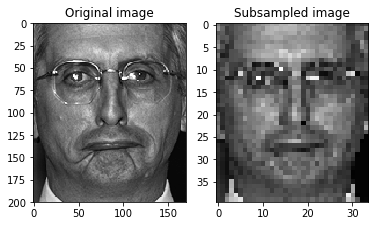

In [15]:
# Example of subsampling
im = faces[0]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im, cmap=plt.cm.gray)
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(im[::5,::5], cmap=plt.cm.gray)
plt.title("Subsampled image")
plt.show()

In [16]:

## -- Your code here -- ##


### Compression

1. Reconstruct images using only the first N eigenfaces (e.g. N=100).
2. Compare (visually) reconstructed images with original images

In [17]:

## -- Your code here -- ##


### Face recognition

1. Using the simplified vector space (e.g. 100 first eigenfaces), compute the euclidian distance between one face and the others.
2. For a subset of the image of the database, find the 4 closest matches.

In [18]:

## -- Your code here -- ##


### Indirect approach

Instead of using the eigenvalues/eigenvectors of $\mathbf{S} = \mathbf{T^TT}$, compute the the eigenvalues/eigenvectors of $\mathbf{Q} = \mathbf{TT^T}$.

Let $\mathbf{u_i}$ be the eigenvectors of $\mathbf{Q}$. We have:
$$\mathbf{TT^T}\mathbf{u}_i = \lambda_i \mathbf{u}_i$$

By multiplying to the left with $\mathbf{T^T}$, we have:
$$\mathbf{T^T}\mathbf{TT^T}\mathbf{u}_i = \lambda_i\mathbf{T^T}\mathbf{u}_i$$
$$\mathbf{S}\mathbf{T^T}\mathbf{u}_i = \lambda_i\mathbf{T^T}\mathbf{u}_i$$

Which means that if $\mathbf{u}_i$ is eigenvector of $\mathbf{Q}$, then $\mathbf{T^T}\mathbf{u}_i$ is eigenvector of $\mathbf{S}$.

The indirect approach thus becomes:
1. Compute the eigenvectors $\mathbf{u}_i$ of $\mathbf{Q} = \mathbf{TT^T}$.
1. Compute the eigenfaces with $\mathbf{v}_i = \mathbf{T^T}\mathbf{u}_i$ 
1. Reconstruct the images using only the first N eigenfaces (e.g. N=100)
1. Compare (visually) reconstructed images with original images
1. Use the indirect approach with more resolution (without subsampling the images)

Use this new feature space to perform the same face recognition method.

In [20]:

## -- Your code here -- ##
